# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        #response = requests.get(f"{url}&q={city}").json()
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Galesong
http://api.openweathermap.org/data/2.5/weather?&q=galesong
Processing Record 2 | Kyrksaeterora
http://api.openweathermap.org/data/2.5/weather?&q=kyrksaeterora
Processing Record 3 | Rocha
http://api.openweathermap.org/data/2.5/weather?&q=rocha
Processing Record 4 | Kapaa
http://api.openweathermap.org/data/2.5/weather?&q=kapaa
Processing Record 5 | Atar
http://api.openweathermap.org/data/2.5/weather?&q=atar
Processing Record 6 | Hobart
http://api.openweathermap.org/data/2.5/weather?&q=hobart
Processing Record 7 | Geraldton
http://api.openweathermap.org/data/2.5/weather?&q=geraldton
Processing Record 8 | Leeston
http://api.openweathermap.org/data/2.5/weather?&q=leeston
Processing Record 9 | Castro
http://api.openweathermap.org/data/2.5/weather?&q=castro
Processing Record 10 | Luderitz
http://api.openweathermap.org/data/2.5/weather?&q=luderitz
Processing Record 11 | Albany
http://api.openweathermap.org/

Processing Record 88 | Hornepayne
http://api.openweathermap.org/data/2.5/weather?&q=hornepayne
Processing Record 89 | Chapais
http://api.openweathermap.org/data/2.5/weather?&q=chapais
Processing Record 90 | Kovdor
http://api.openweathermap.org/data/2.5/weather?&q=kovdor
Processing Record 91 | Pevek
http://api.openweathermap.org/data/2.5/weather?&q=pevek
Processing Record 92 | Codrington
http://api.openweathermap.org/data/2.5/weather?&q=codrington
Processing Record 93 | Duncan
http://api.openweathermap.org/data/2.5/weather?&q=duncan
Processing Record 94 | Sorland
http://api.openweathermap.org/data/2.5/weather?&q=sorland
Processing Record 95 | Constitucion
http://api.openweathermap.org/data/2.5/weather?&q=constitucion
Processing Record 96 | Druzhba
http://api.openweathermap.org/data/2.5/weather?&q=druzhba
Processing Record 97 | Bluff
http://api.openweathermap.org/data/2.5/weather?&q=bluff
Processing Record 98 | Dikson
http://api.openweathermap.org/data/2.5/weather?&q=dikson
Processing Re

Processing Record 174 | Svetlaya
http://api.openweathermap.org/data/2.5/weather?&q=svetlaya
Processing Record 175 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?&q=ketchikan
City not found. Skipping...
Processing Record 176 | Smoky Lake
http://api.openweathermap.org/data/2.5/weather?&q=smoky lake
Processing Record 177 | Norwalk
http://api.openweathermap.org/data/2.5/weather?&q=norwalk
City not found. Skipping...
Processing Record 178 | Saint-Francois
http://api.openweathermap.org/data/2.5/weather?&q=saint-francois
Processing Record 179 | Ishinomaki
http://api.openweathermap.org/data/2.5/weather?&q=ishinomaki
Processing Record 180 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?&q=tasiilaq
City not found. Skipping...
Processing Record 181 | Corpus Christi
http://api.openweathermap.org/data/2.5/weather?&q=corpus christi
Processing Record 182 | Ekibastuz
http://api.openweathermap.org/data/2.5/weather?&q=ekibastuz
City not found. Skipping...
Processing Record 183 | La

Processing Record 258 | Talnakh
http://api.openweathermap.org/data/2.5/weather?&q=talnakh
City not found. Skipping...
Processing Record 259 | Mackay
http://api.openweathermap.org/data/2.5/weather?&q=mackay
Processing Record 260 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?&q=qaqortoq
Processing Record 261 | Khromtau
http://api.openweathermap.org/data/2.5/weather?&q=khromtau
Processing Record 262 | Dharchula
http://api.openweathermap.org/data/2.5/weather?&q=dharchula
City not found. Skipping...
Processing Record 263 | Masvingo
http://api.openweathermap.org/data/2.5/weather?&q=masvingo
Processing Record 264 | Grand-Lahou
http://api.openweathermap.org/data/2.5/weather?&q=grand-lahou
Processing Record 265 | Mengcheng
http://api.openweathermap.org/data/2.5/weather?&q=mengcheng
Processing Record 266 | Benjamin Constant
http://api.openweathermap.org/data/2.5/weather?&q=benjamin constant
City not found. Skipping...
Processing Record 267 | Santiago
http://api.openweathermap.org/dat

Processing Record 340 | Caravelas
http://api.openweathermap.org/data/2.5/weather?&q=caravelas
Processing Record 341 | Yerofey Pavlovich
http://api.openweathermap.org/data/2.5/weather?&q=yerofey pavlovich
Processing Record 342 | Chignahuapan
http://api.openweathermap.org/data/2.5/weather?&q=chignahuapan
Processing Record 343 | Lianzhou
http://api.openweathermap.org/data/2.5/weather?&q=lianzhou
Processing Record 344 | Juneau
http://api.openweathermap.org/data/2.5/weather?&q=juneau
Processing Record 345 | Broome
http://api.openweathermap.org/data/2.5/weather?&q=broome
Processing Record 346 | Junin
http://api.openweathermap.org/data/2.5/weather?&q=junin
City not found. Skipping...
Processing Record 347 | Clyde River
http://api.openweathermap.org/data/2.5/weather?&q=clyde river
Processing Record 348 | Aksu
http://api.openweathermap.org/data/2.5/weather?&q=aksu
Processing Record 349 | Copiapo
http://api.openweathermap.org/data/2.5/weather?&q=copiapo
Processing Record 350 | Ilulissat
http://a

Processing Record 424 | Jedrzejow
http://api.openweathermap.org/data/2.5/weather?&q=jedrzejow
City not found. Skipping...
Processing Record 425 | Sankt Veit
http://api.openweathermap.org/data/2.5/weather?&q=sankt veit
Processing Record 426 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?&q=oranjemund
Processing Record 427 | Candolim
http://api.openweathermap.org/data/2.5/weather?&q=candolim
City not found. Skipping...
City not found. Skipping...
Processing Record 428 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?&q=deputatskiy
Processing Record 429 | Macau
http://api.openweathermap.org/data/2.5/weather?&q=macau
Processing Record 430 | Carmarthen
http://api.openweathermap.org/data/2.5/weather?&q=carmarthen
City not found. Skipping...
Processing Record 431 | Pemba
http://api.openweathermap.org/data/2.5/weather?&q=pemba
Processing Record 432 | Tarko-Sale
http://api.openweathermap.org/data/2.5/weather?&q=tarko-sale
Processing Record 433 | Hithadhoo
http://api.ope

Processing Record 508 | Cochrane
http://api.openweathermap.org/data/2.5/weather?&q=cochrane
Processing Record 509 | Tefe
http://api.openweathermap.org/data/2.5/weather?&q=tefe
Processing Record 510 | Vardo
http://api.openweathermap.org/data/2.5/weather?&q=vardo
Processing Record 511 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?&q=ixtapa
Processing Record 512 | Katsuura
http://api.openweathermap.org/data/2.5/weather?&q=katsuura
Processing Record 513 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?&q=mogadishu
Processing Record 514 | Jiwani
http://api.openweathermap.org/data/2.5/weather?&q=jiwani
Processing Record 515 | Portland
http://api.openweathermap.org/data/2.5/weather?&q=portland
Processing Record 516 | Doha
http://api.openweathermap.org/data/2.5/weather?&q=doha
Processing Record 517 | Vysokogornyy
http://api.openweathermap.org/data/2.5/weather?&q=vysokogornyy
Processing Record 518 | Mooresville
http://api.openweathermap.org/data/2.5/weather?&q=mooresville
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
table_dict = {'City': city_name,
              'Cloudiness': cloudiness,
              'Country': country,
              'Date': date,
              'Humidity': humidity,
              'Lat': lat,
              'Lng': lng,
              'Max Temp': max_temp,
              'Wind Speed': wind_speed
             }
weather_data_df = pd.DataFrame(table_dict)
weather_data_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [67]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Galesong,40,ID,1547946000,88,-5.32,119.37,82.40,3.36
1,Kyrksaeterora,75,NO,1547945400,55,63.29,9.09,33.80,14.99
2,Rocha,44,UY,1547947963,75,-34.48,-54.34,60.84,6.85
3,Kapaa,20,US,1547945760,64,22.08,-159.32,80.06,13.87
4,Atar,0,MR,1547948072,60,20.52,-13.05,45.68,6.51


In [69]:
out = pd.DataFrame.from_records(weather_data_df)
out.head()

out.to_csv("weatherdata.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

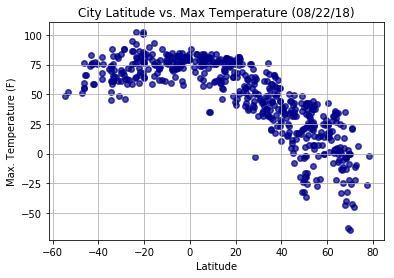

In [75]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", s=30, color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Max Temp vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

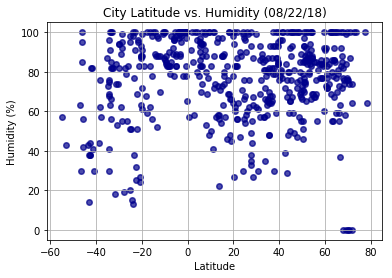

In [76]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o", s=30, color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Humidity vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

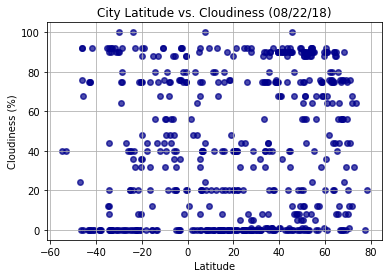

In [77]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", s=30,  color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Cloudiness vs Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

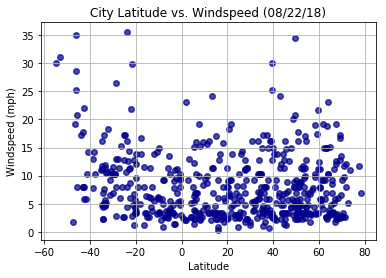

In [78]:
# Build a scatter plot for each data type
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", s=30,  color = "darkblue", alpha = 0.7, linewidth = 1.5)

# Other graph properties
plt.title("City Latitude vs. Windspeed (08/22/18)")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather Plots/Windspeed vs Lat.png")

# Show plot
plt.show()

In [ ]:
#three observable trends based on the data
